# *****Loading data from Google Bigquery*****

**Imports necessary libraries for loading data from google bigquery**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import auth
from google.cloud import bigquery
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load data from google bigquery**

In [ ]:
# Authenticate user
auth.authenticate_user()

# Create BigQuery client
client = bigquery.Client(project='projectmadt')

# Define your query
query = """
SELECT *
FROM `projectmadt.mootod_preject_data.analytics_table`
"""

# Execute the query and retrieve the results as a DataFrame
df = client.query(query).to_dataframe()

# Display the DataFrame
df = df.sort_values('order_id', ascending=True)
df

,order_id,ref_no,time,sale_time,sale_day,sale_month,sale_year,vendor,vendor_name,bill_type,bill_type_name,pickup_type,pickup_type_name,payment_method,payment_method_name,sale,payment,tip,change
2990,0,3001012,2022-03-07T11:39:00,11:39:00,7,3,2022,2,Minnie,2,To_go,7,Robinhood,3,other,400.0,400.0,0.0,0.0
2688,1,3001013,2022-03-07T11:43:00,11:43:00,7,3,2022,2,Minnie,2,To_go,4,GrabFood,3,other,300.0,300.0,0.0,0.0
2147,2,3001014,2022-03-07T11:52:00,11:52:00,7,3,2022,2,Minnie,2,To_go,2,pickup_by_themselves,2,cash,65.0,100.0,0.0,35.0
2804,3,3001015,2022-03-07T11:56:00,11:56:00,7,3,2022,2,Minnie,2,To_go,6,ShopeeFood,3,other,180.0,180.0,0.0,0.0
2848,4,3001016,2022-03-07T11:56:00,11:56:00,7,3,2022,2,Minnie,2,To_go,6,ShopeeFood,3,other,180.0,180.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,10255,3011576,2023-03-31T18:13:00,18:13:00,31,3,2023,2,Minnie,1,For_here,1,served,2,cash,22.0,22.0,0.0,0.0
1516,10256,3011577,2023-03-31T18:29:00,18:29:00,31,3,2023,2,Minnie,1,For_here,1,served,1,transfer,326.0,326.0,0.0,0.0
1998,10257,3011578,2023-03-31T19:50:00,19:50:00,31,3,2023,2,Minnie,2,To_go,2,pickup_by_themselves,2,cash,22.0,40.0,0.0,18.0
1803,10258,3011579,2023-03-31T20:38:00,20:38:00,31,3,2023,2,Minnie,1,For_here,1,served,1,transfer,159.0,159.0,0.0,0.0


# *****Exploring data with data visualisation*****


**Imports necessary libraries for data visualization**

In [ ]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

**Distribution of sales**


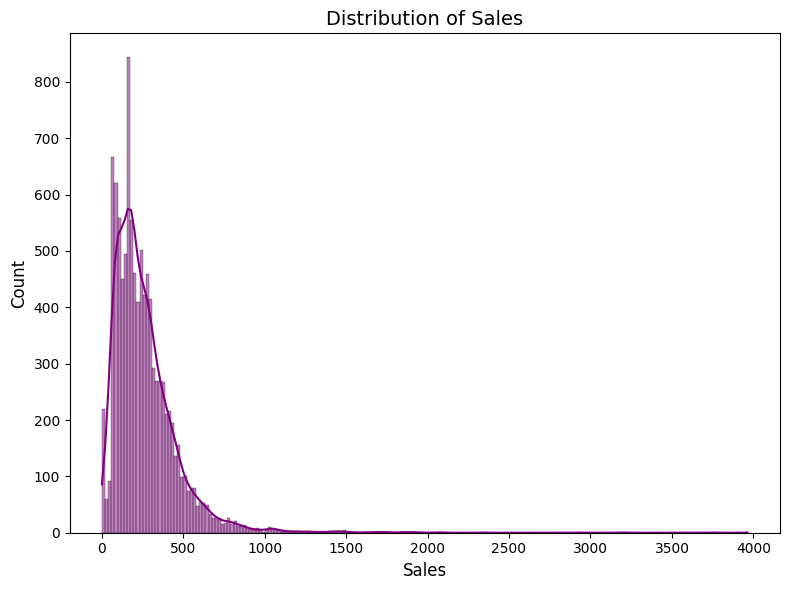

In [ ]:
# Plotting distribution of sales
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sale', kde=True, color='purple')

plt.title('Distribution of Sales', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

**Total sales by vendor**

<ipython-input-5-e4de51eae5a3>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x_labels)


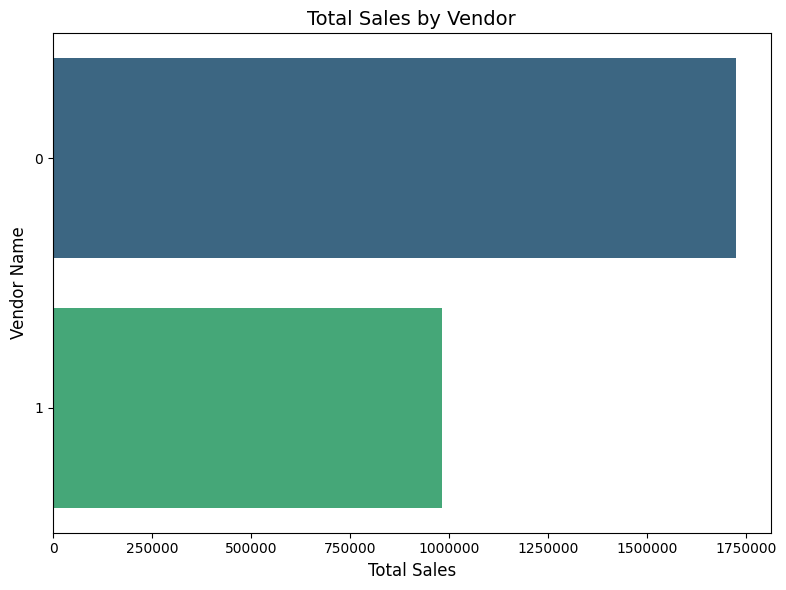

In [ ]:
# Plotting total sales by vendor
sales_by_vendor = df.groupby('vendor_name')['sale'].sum().reset_index()
sales_by_vendor = sales_by_vendor.sort_values('sale', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='sale', y='vendor_name', data=sales_by_vendor, palette='viridis')

plt.title('Total Sales by Vendor', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Vendor Name', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Disable scientific notation for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

# Format x-axis tick labels as integers
x_labels = ['{:.0f}'.format(x) for x in plt.gca().get_xticks()]
plt.gca().set_xticklabels(x_labels)

plt.tight_layout()
plt.show()


**Total payment by payment method**

<ipython-input-6-3b3cf670308c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x_labels)


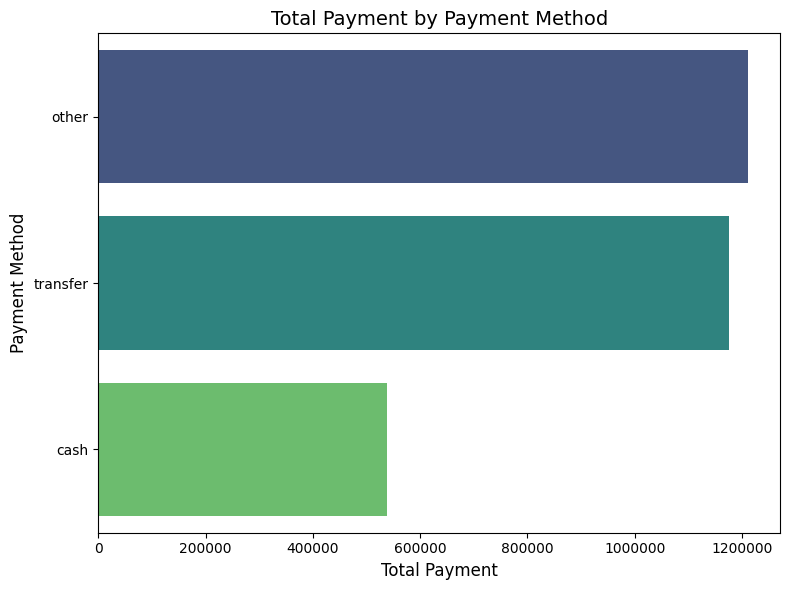

In [ ]:
# Plotting total payment by payment method
payment_by_payment_method = df.groupby('payment_method_name')['payment'].sum().reset_index()
payment_by_payment_method = payment_by_payment_method.sort_values('payment', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='payment', y='payment_method_name', data=payment_by_payment_method, palette='viridis')

plt.title('Total Payment by Payment Method', fontsize=14)
plt.xlabel('Total Payment', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Format x-axis tick labels as integers
x_labels = ['{:.0f}'.format(x) for x in plt.gca().get_xticks()]
plt.gca().set_xticklabels(x_labels)

plt.tight_layout()
plt.show()



**Total Sales by Year**

<ipython-input-7-0e7829249f16>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_labels)


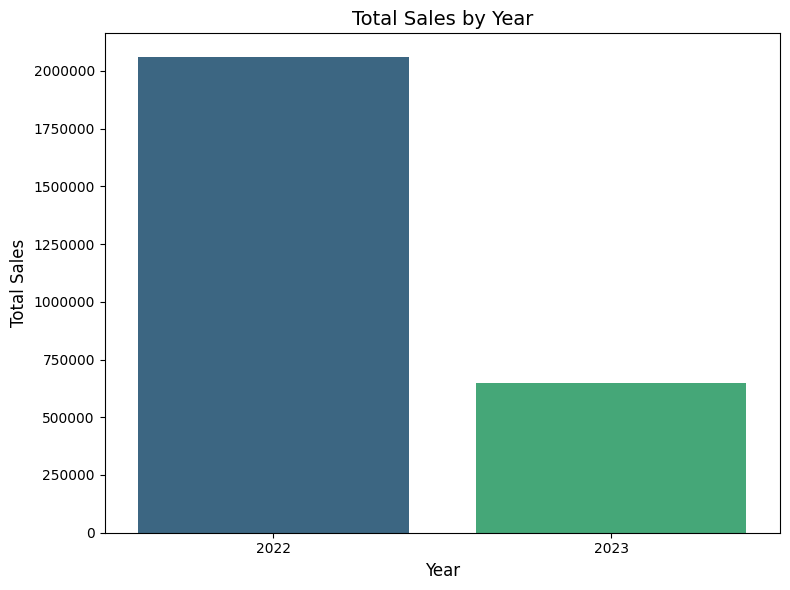

In [ ]:
# Total Sales by Year
sales_by_year = df.groupby('sale_year')['sale'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values, palette='viridis')

plt.title('Total Sales by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Format x-axis tick labels as integers
y_labels = ['{:.0f}'.format(x) for x in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)

plt.tight_layout()
plt.show()

**Total sale by month**

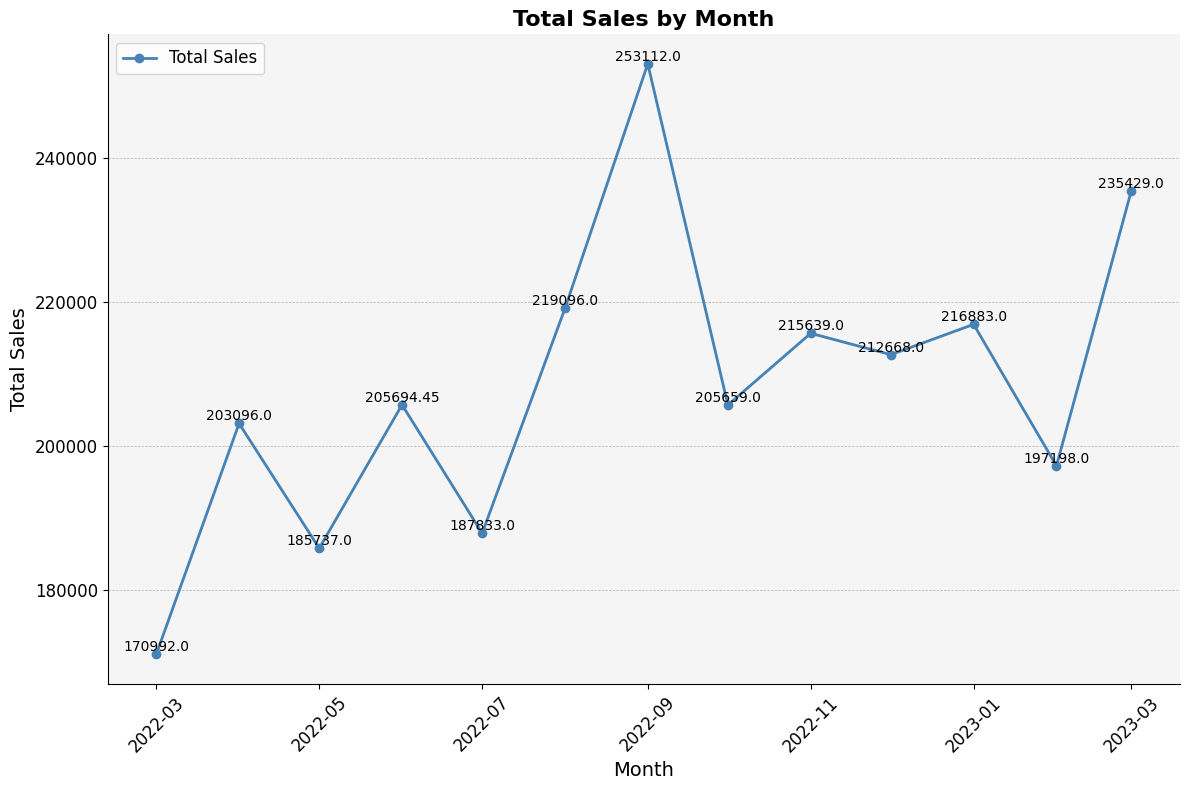

In [ ]:
# Plot total sale by month
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S')
sales_by_month = df.groupby(df['time'].dt.to_period('M'))['sale'].sum()
sales_by_month.index = sales_by_month.index.to_timestamp()

plt.figure(figsize=(12, 8))
plt.plot(sales_by_month.index, sales_by_month.values, marker='o', color='steelblue', linewidth=2)
plt.title('Total Sales by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(['Total Sales'], loc='upper left', fontsize=12)

for x, y in zip(sales_by_month.index, sales_by_month.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# *****Machine Learning : Sale Prediction*****


**Imports necessary libraries for sale prediction**

In [ ]:
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

**Create some useful function**

In [ ]:
#crete function

def preprocess_data(df):
    # Drop unnecessary columns
    df = df.drop(columns=['ref_no', 'order_id', 'time', 'sale_day', 'sale_month', 'sale_year', 'vendor_name',
                          'bill_type_name', 'pickup_type_name', 'payment_method_name', 'tip', 'change', 'payment'])
    df.reset_index(drop=True, inplace=True)

    df['sale_time'] = pd.to_datetime(df['sale_time'])
    # Extract hour of the day from sale_time
    df['hour_of_day'] = df['sale_time'].dt.hour

    # Drop year, month, and day from sale_time
    df['sale_time'] = df['sale_time'].dt.strftime('%H:%M:%S')

    return df

def train_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=345)

    # Create a Random Forest regressor
    regressor = RandomForestRegressor()

    # Train the regressor on the training data
    regressor.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = regressor.predict(X_test)

    # Evaluate the model's performance using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Plot scatter plot
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Scatter Plot of Predicted vs. Actual Values")
    plt.show()

    # Plot residual plot
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    return regressor

def predict_sales(test_data, regressor):
    # Convert sale_time column to datetime and extract hour of the day
    test_data['sale_time'] = pd.to_datetime(test_data['sale_time'], format='%H:%M:%S')
    test_data['hour_of_day'] = test_data['sale_time'].dt.hour

    # Make predictions on the new data
    predictions = regressor.predict(test_data.drop('sale_time', axis=1))
    test_data['predicted_sale'] = predictions
    test_data['sale_time'] = test_data['sale_time'].dt.time

    return test_data

**Train Model**

Mean Squared Error: 39270.280668298445


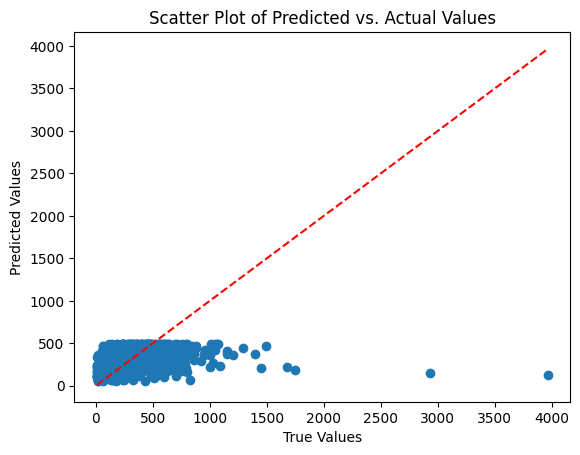

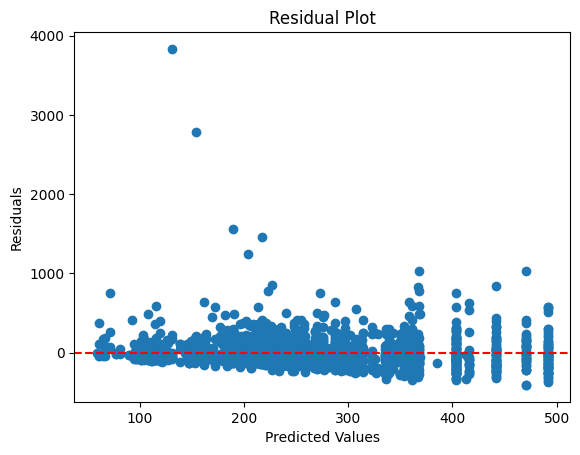

In [ ]:
# Load data
df = client.query(query).to_dataframe()
df = df.sort_values('order_id', ascending=True)

# Preprocess data
data = preprocess_data(df)

# Separate the features (X) and the target variable (y)
X = data.drop(['sale', 'sale_time'], axis=1)
y = data['sale']

# Train the model
regressor = train_model(X, y)


**Testing Inference**

In [ ]:
# Test the model on new data
test_data = pd.DataFrame({
    'sale_time': ['11:39:00', '11:43:00', '11:52:00', '11:56:00', '12:20:00'],
    'vendor': [2, 1, 1, 2, 2],
    'bill_type': [2, 2, 2, 2, 2],
    'pickup_type': [7, 4, 2, 6, 6],
    'payment_method': [3, 3, 2, 3, 3],
})

predicted_data = predict_sales(test_data, regressor)

print("New Data with Predicted Sale Amounts:")
predicted_data

New Data with Predicted Sale Amounts:


,sale_time,vendor,bill_type,pickup_type,payment_method,hour_of_day,predicted_sale
0,11:39:00,2,2,7,3,11,217.005542
1,11:43:00,1,2,4,3,11,268.085394
2,11:52:00,1,2,2,2,11,108.163768
3,11:56:00,2,2,6,3,11,191.984099
4,12:20:00,2,2,6,3,12,215.131776


**Saving Model**

In [ ]:
# Save the trained model
joblib.dump(regressor, '/content/drive/MyDrive/madt/sale-predict-model.pkl')

['/content/drive/MyDrive/madt/sale-predict-model.pkl']

#**Ingesting Model to Storage Bucket**

In [ ]:
from google.cloud import storage

project_id = 'mootod_data_project'
bucket_name = 'mootod_data_project'
bucket = storage.Client(project=project_id).bucket(bucket_name)
local_file_path = '/content/drive/MyDrive/madt/sale-predict-model.pkl'
blob = bucket.blob('sale-predict-model.pkl')
blob.upload_from_filename(local_file_path)

In [ ]:
df = client.query(query).to_dataframe()
df = df.drop(columns=['ref_no', 'order_id', 'sale_time', 'sale_day', 'sale_month', 'sale_year', 'vendor_name',
                          'bill_type_name', 'pickup_type_name', 'payment_method_name', 'tip', 'change', 'payment','vendor','bill_type','pickup_type','payment_method'])
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time', ascending=True)
df.reset_index(drop=True)

,time,sale
0,2022-03-07 11:39:00,400.0
1,2022-03-07 11:43:00,300.0
2,2022-03-07 11:52:00,65.0
3,2022-03-07 11:56:00,180.0
4,2022-03-07 11:56:00,180.0
...,...,...
10255,2023-03-31 18:13:00,22.0
10256,2023-03-31 18:29:00,326.0
10257,2023-03-31 19:50:00,22.0
10258,2023-03-31 20:38:00,159.0


Root Mean Squared Error (RMSE): 52913.42122792382


<ipython-input-74-c7a9d17ea500>:35: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  extended_df = extended_df.append(pd.Series(name=date_range[-3]))  # Add empty rows for the next 3 months
<ipython-input-74-c7a9d17ea500>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extended_df = extended_df.append(pd.Series(name=date_range[-3]))  # Add empty rows for the next 3 months


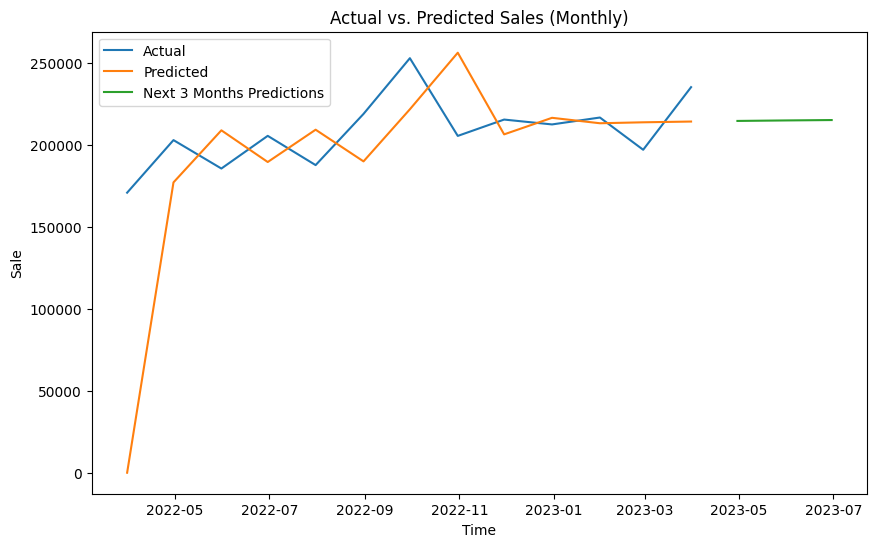

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set 'time' column as the index of the DataFrame
df.set_index('time', inplace=True)

# Resample the data to a monthly frequency
df_monthly = df.resample('M').sum()

# Split the data into training and testing sets
train_size = int(len(df_monthly) * 0.8)  # 80% for training
train_data = df_monthly[:train_size]
test_data = df_monthly[train_size:]

# Fit the ARIMA model
model = ARIMA(train_data['sale'], order=(1, 1, 1))  # Set the order of the AR, I, and MA components
model_fit = model.fit()

# Make predictions on the entire dataset
predictions = model_fit.predict(start=0, end=len(df_monthly) + 2)  # Predict for the next 3 months

# Evaluate the model
mse = mean_squared_error(df_monthly['sale'], predictions[:-3])  # Exclude the predictions for the next 3 months
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Create a datetime range for the entire dataset including the next 3 months
date_range = pd.date_range(start=df_monthly.index[0], periods=len(df_monthly) + 3, freq='M')

# Create an extended dataset for plotting
extended_df = df_monthly.copy()
extended_df = extended_df.append(pd.Series(name=date_range[-3]))  # Add empty rows for the next 3 months

# Visualize the actual values, test predictions, and next 3 months predictions
plt.figure(figsize=(10, 6))
plt.plot(extended_df.index, extended_df['sale'], label='Actual')
plt.plot(df_monthly.index, predictions[:-3], label='Predicted')
plt.plot(date_range[-3:], predictions[-3:], label='Next 3 Months Predictions')
plt.xlabel('Time')
plt.ylabel('Sale')
plt.title('Actual vs. Predicted Sales (Monthly)')
plt.legend()
plt.show()
